In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
data = pd.read_csv("houseprice.csv")

In [138]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,built_year,renovated_year,price
0,4,1,-0.027009,0.890271,1,1,2,2,0.407785,1.637256,1914,1964,762710
1,4,2,1.025943,0.276700,1,1,4,1,-0.466143,-1.631128,1981,1917,772266
2,5,3,-0.551922,0.036500,2,1,4,4,1.127150,0.642531,1976,2016,851812
3,5,2,0.890549,0.235783,2,0,4,3,-0.760823,-1.357578,1904,1957,521792
4,5,3,-0.147822,0.590400,1,0,3,4,-0.012567,0.592794,2002,1955,671104


In [56]:
data.isnull().sum()

bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
built_year        0
renovated_year    0
price             0
dtype: int64

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'built_year'] 
data[num_features] = scaler.fit_transform(data[num_features])

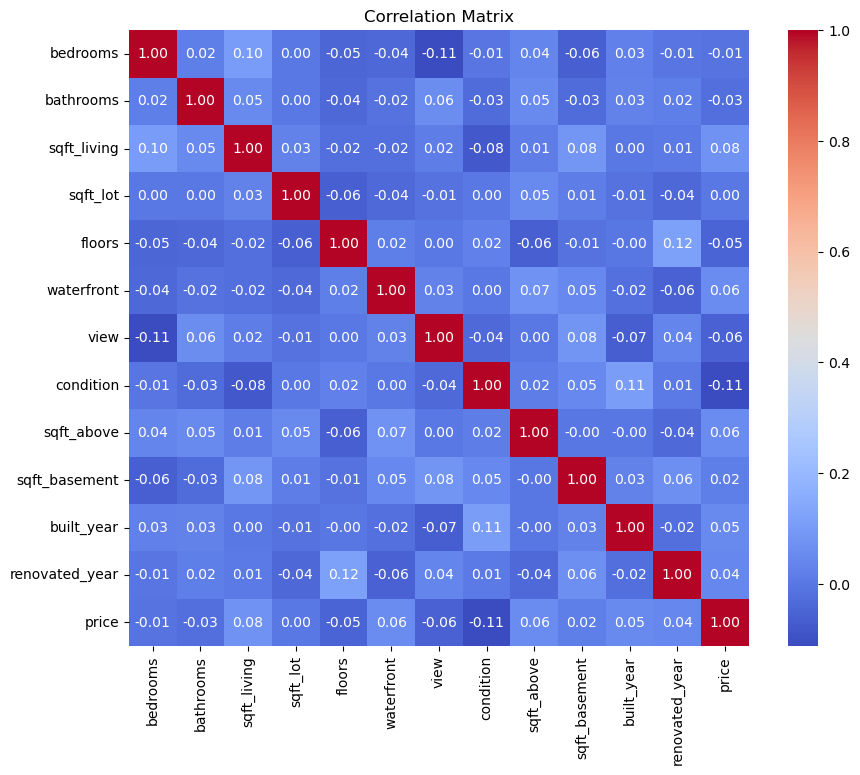

In [169]:
# Correlation matrix (Correlation Analysis that each feature correlates with the target(price))
corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt= '.2f')
plt.title("Correlation Matrix")
plt.show()

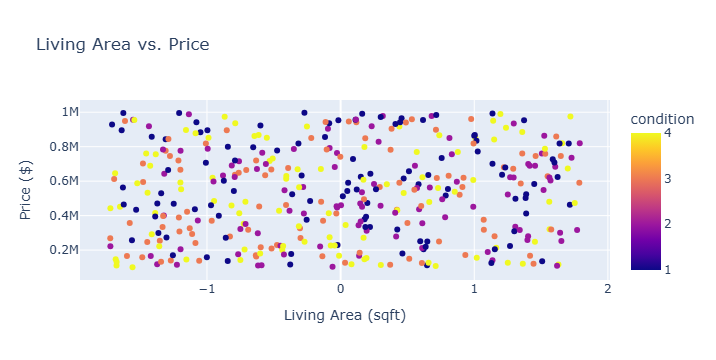

In [177]:
# sqft_living vs price (relationship between living area and price )
import plotly.express as px

fig = px.scatter(
    data,
    x = 'sqft_living',
    y = 'price',
    title = 'Living Area vs. Price',
    labels={'sqft_living':'Living Area (sqft)','price': 'Price ($)'},
    color = 'condition'
)
fig.show()

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:

x = data.iloc[:,: -1]
y = data['price']

In [87]:
#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [89]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [99]:
# Make prediction
y_pred = model.predict(x_test)

In [103]:
mse = mean_squared_error(y_test,y_pred)

In [105]:
mse

76282306539.19055

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
# RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [113]:
rfg_y_pred = rfg.predict(x_test)
mse_rfg = mean_squared_error(y_test,rfg_y_pred)

In [127]:
r2_rfg = r2_score(y_test,rfg_y_pred)

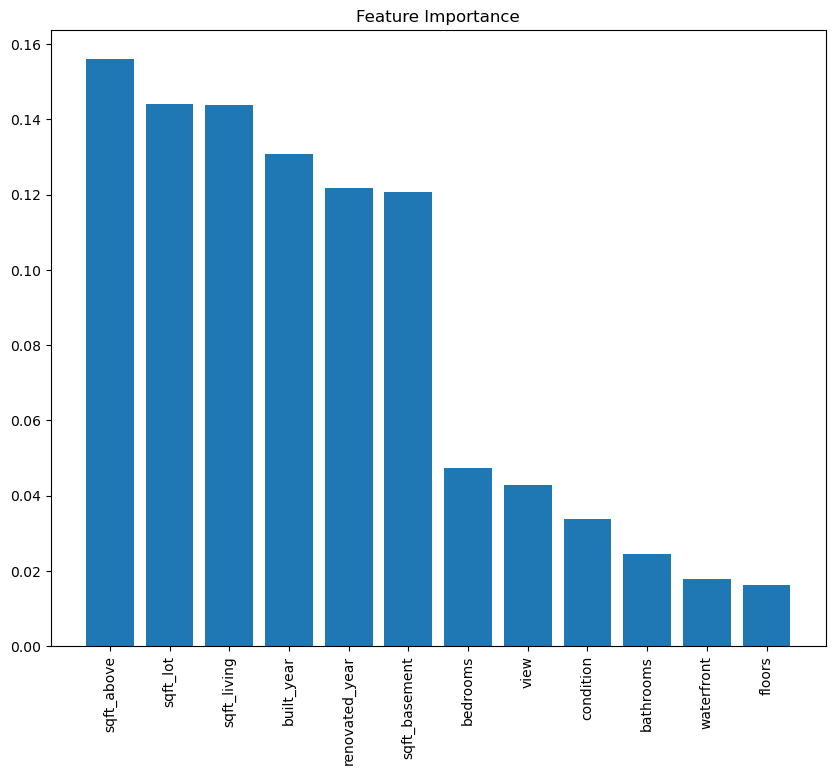

In [132]:
feature_importances = rfg.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10,8))
plt.bar(range(x_train.shape[1]), feature_importances[indices])
plt.xticks(range(x_train.shape[1]), x.columns[indices], rotation = 90)
plt.title("Feature Importance")
plt.show()

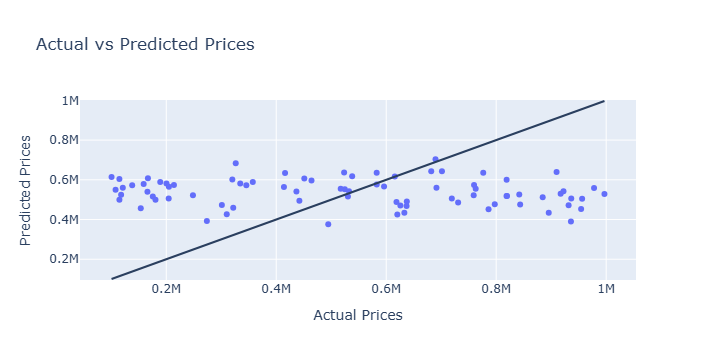

In [136]:
fig = px.scatter(x=y_test, y=rfg_y_pred, 
                 labels={'x': 'Actual Prices', 'y': 'Predicted Prices'},
                 title="Actual vs Predicted Prices")
fig.add_shape(type='line', x0=y_test.min(), x1=y_test.max(), y0=y_test.min(), y1=y_test.max())
fig.show()
